
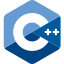
<br>

<div style="text-align:center; font-size:200%;">
 <b>Destruktoren</b>
</div>
<br/>
<div style="text-align:center; font-size:120%;">Dr. Matthias Hölzl</div>
<br/>
<div style="text-align:center;">Coding-Akademie München</div>
<br/>
<!-- 13 Destruktoren.ipynb -->
<!-- slides/module_150_classes/topic_170_destructors.cpp -->


## Destruktoren

- Destruktoren sind spezielle Member-Funktionen, die aufgerufen werden, wenn
  ein Objekt zerstört wird.
- Destruktoren haben keinen Rückgabetyp und keinen Parameter.
- Destruktoren können nicht überladen werden.

In [ ]:
#include <iostream>

In [ ]:
struct MyStruct {
    int i;

    MyStruct(int i = 1) : i{i} {
        std::cout << "MyStruct(" << i << ")\n";
    }

    ~MyStruct() {
        std::cout << "~MyStruct(" << i << ")\n";
    }
};

In [ ]:
{
    MyStruct my_struct{};
}

In [ ]:
{
    MyStruct my_struct{};
    MyStruct my_struct2{2};
}

In [ ]:
MyStruct* my_struct_ptr = new MyStruct{};

In [ ]:
delete my_struct_ptr;


- Destruktoren erlauben es uns, Ressourcen freizugeben, die von einem Objekt
  verwaltet werden.
- Das kann z.B. Speicher sein, der mit `new` allokiert wurde.
- Diese automatische Freigabe von Ressourcen ist ein wichtiger Bestandteil
  von korrekten C++-Programmen.
- In C++ werden Ressourcen im Konstruktor einer Klasse allokiert und im
  Destruktor freigegeben.
- Man nennt das "Resource Acquisition Is Initialization" (RAII).

In [ ]:
class ManagedArray {
    int* data_;
    int size_;

public:
    ManagedArray(int size) : data_{new int[size]}, size_{size} {
        std::cout << "ManagedArray(" << size << ")\n";
    }

    ~ManagedArray() {
        delete[] data_;
        std::cout << "~ManagedArray(" << size_ << ")\n";
    }

    // Functionality for working with the pointer.
};

In [ ]:
{
    ManagedArray ma{5};
}

In [ ]:
{
    ManagedArray ma{5};
    ManagedArray ma2{10};
}

In [ ]:
ManagedArray* ma_ptr = new ManagedArray{5};

In [ ]:
delete ma_ptr;


## Workshop: Stack mit fester Maximalgröße

In diesem Workshop implementieren wir eine Klasse `FixedStack`, die einen
Stack von `int`-Werten mit fester Maximalgröße implementiert.


- Ein Stack ist eine Datenstruktur, die nach dem LIFO-Prinzip (Last In, First
  Out) arbeitet.
- Die Maximalgröße einer `FixedStack`-Instanz wird beim Aufruf des
  Konstruktors übergeben.
- Die Klasse soll die Methoden `push()`, `pop()` und `top()` implementieren.
- Mit `void FixedStack::push(int i)` wird ein Wert auf den Stack gelegt.
  Falls der Stack bereits seine maximale Zahl an Elementen enthält, soll
  nichts passieren.
- Mit `void FixedStack::pop()` wird das oberste Element vom Stack entfernt.
  Falls der Stack leer ist, soll nichts passieren.
- Mit `int FixedStack top() const` kann das oberste Element des Stacks
  gelesen werden. Falls der Stack leer ist, soll `-1` zurückgegeben werden.
- Es wäre besser, in den Ausnahmefällen eine Exception zu werfen, aber das
  wurde in diesem Kurs noch nicht behandelt.


Zum Beispiel soll der folgende Code


```cpp
{
    FixedStack fs{5};

    for (int i = 0; i < 8; ++i) {
        fs.push(i);
    }

    for (int i = 0; i < 3; ++i) {
        std::cout << fs.top() << " ";
        fs.pop();
    }

    std::cout << "\n";

    for (int i = 10; i < 20; ++i) {
        fs.push(i);
    }

    for (int i = 0; i < 8; ++i) {
        std::cout << fs.top() << " ";
        fs.pop();
    }

    std::cout << "\n";
}
```


soll die folgende Ausgabe erzeugen:

```
4 3 2
12 11 10 1 0 -1 -1 -1
```


- Implementieren Sie die Klasse `FixedStack`.
- Verwenden Sie ein Heap-allokiertes Array, um die Elemente zu speichern.
- Achten Sie darauf, dass der Speicher für die Elemente freigegeben wird,
  wenn ein `FixedStack`-Objekt zerstört wird.

### Hinweise:

- Es wäre erheblich besser, einen Vektor zur Speicherung der Elemente zu
  verwenden.
- Noch besser wäre es, die Klasse `std::stack` zu verwenden statt sie selbst
  zu implementieren.

In [ ]:
class FixedStack {
    int* data_;
    int size_;
    int top_;

public:
    FixedStack(int size) : data_{new int[size]}, size_{size}, top_{0} {
        std::cout << "FixedStack(" << size << ")\n";
    }

    ~FixedStack() {
        delete[] data_;
        std::cout << "~FixedStack(" << size_ << ")\n";
    }

    void push(int i) {
        if (top_ < size_) {
            data_[top_++] = i;
        }
    }

    void pop() {
        if (top_ > 0) {
            --top_;
        }
    }

    int top() const {
        if (top_ > 0) {
            return data_[top_ - 1];
        }
        return -1;
    }
};

In [ ]:
{
    FixedStack fs{5};

    for (int i = 0; i < 8; ++i) {
        fs.push(i);
    }

    for (int i = 0; i < 3; ++i) {
        std::cout << fs.top() << " ";
        fs.pop();
    }

    std::cout << "\n";

    for (int i = 10; i < 20; ++i) {
        fs.push(i);
    }

    for (int i = 0; i < 8; ++i) {
        std::cout << fs.top() << " ";
        fs.pop();
    }

    std::cout << "\n";
}